In [1]:
import sys
sys.path.append('/Users/dmitry/Desktop/Thesis/Libs')

In [6]:
import learners
import plots
import datasets
import encoders
import models
import matplotlib.pyplot as plt

In [15]:
x_train, y_train, x_test, y_test = datasets.get_mnist()

In [5]:
mnist_encoder = encoders.get_mnist_encoder()

=== Preparing MNIST encoder ===


In [8]:
INIT_SIZE = 2000
TRAIN_SIZE = 10000
QUERIED_SIZE = 300

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (100 of 100) |######################| Elapsed Time: 0:23:10 Time:  0:23:10


=== uncertainty only learning finished ===


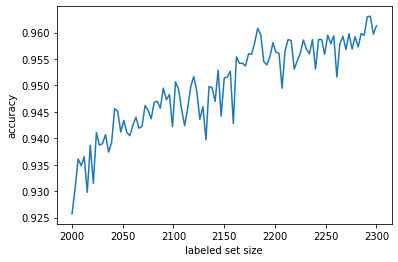

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (100 of 100) |######################| Elapsed Time: 0:22:18 Time:  0:22:18


=== uncertainty only learning finished ===


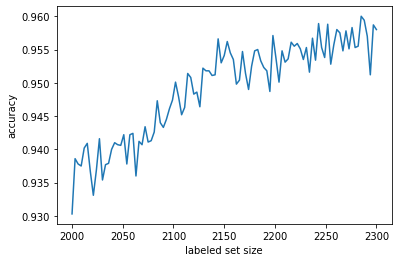

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (100 of 100) |######################| Elapsed Time: 0:24:36 Time:  0:24:36


=== uncertainty only learning finished ===


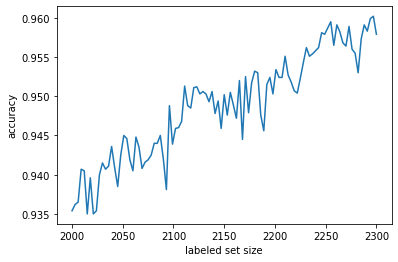

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (100 of 100) |######################| Elapsed Time: 0:29:31 Time:  0:29:31


=== uncertainty only learning finished ===


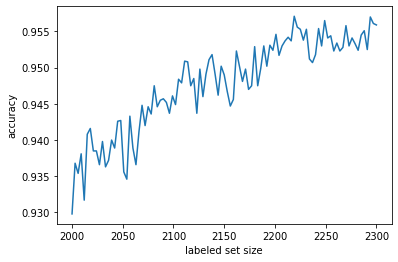

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (100 of 100) |######################| Elapsed Time: 0:30:14 Time:  0:30:14


=== uncertainty only learning finished ===


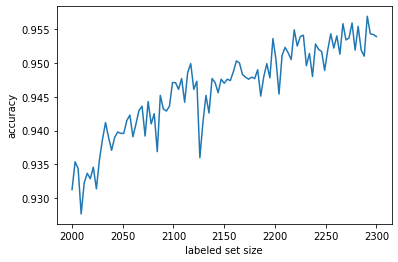

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (60 of 60) |########################| Elapsed Time: 0:26:36 Time:  0:26:36


=== uncertainty only learning finished ===


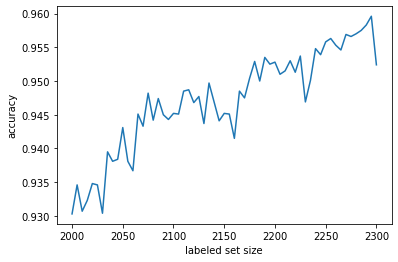

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (60 of 60) |########################| Elapsed Time: 0:23:42 Time:  0:23:42


=== uncertainty only learning finished ===


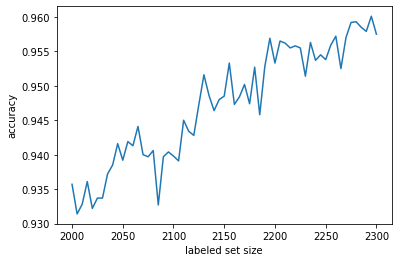

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (60 of 60) |########################| Elapsed Time: 0:17:08 Time:  0:17:08


=== uncertainty only learning finished ===


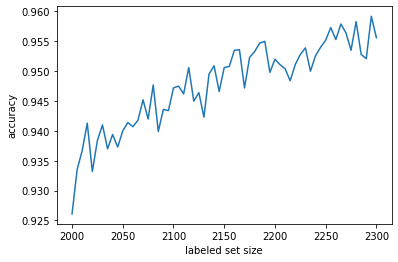

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (60 of 60) |########################| Elapsed Time: 0:17:02 Time:  0:17:02


=== uncertainty only learning finished ===


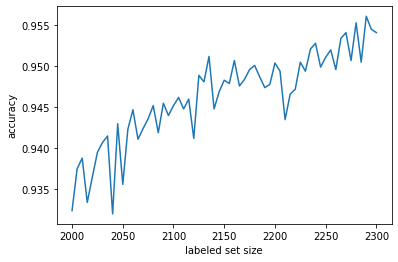

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (60 of 60) |########################| Elapsed Time: 0:17:22 Time:  0:17:22


=== uncertainty only learning finished ===


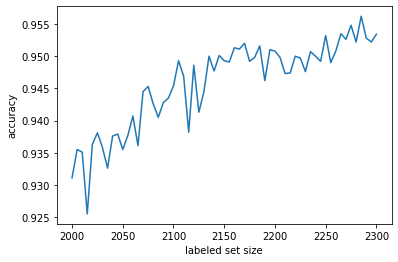

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (30 of 30) |########################| Elapsed Time: 0:08:31 Time:  0:08:31


=== uncertainty only learning finished ===


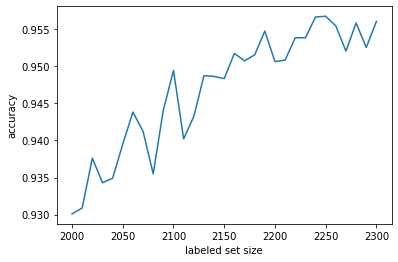

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (30 of 30) |########################| Elapsed Time: 0:08:32 Time:  0:08:32


=== uncertainty only learning finished ===


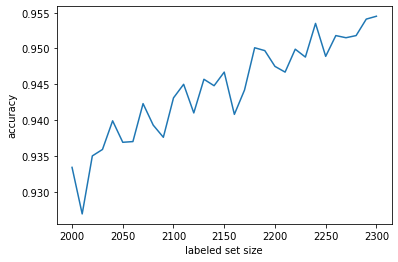

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (30 of 30) |########################| Elapsed Time: 0:08:27 Time:  0:08:27


=== uncertainty only learning finished ===


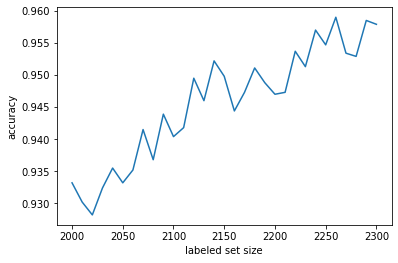

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (30 of 30) |########################| Elapsed Time: 0:08:31 Time:  0:08:31


=== uncertainty only learning finished ===


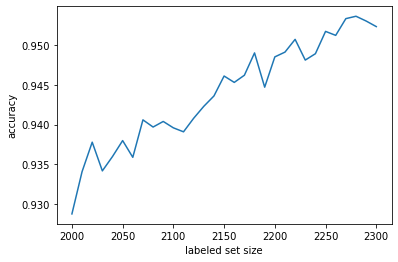

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (30 of 30) |########################| Elapsed Time: 0:08:35 Time:  0:08:35


=== uncertainty only learning finished ===


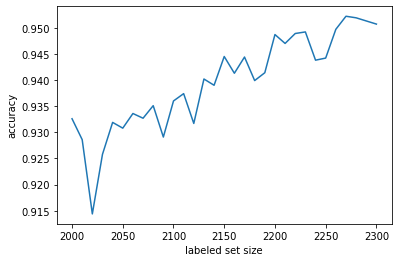

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (15 of 15) |########################| Elapsed Time: 0:04:07 Time:  0:04:07


=== uncertainty only learning finished ===


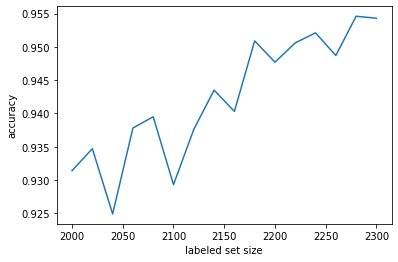

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (15 of 15) |########################| Elapsed Time: 0:04:05 Time:  0:04:05


=== uncertainty only learning finished ===


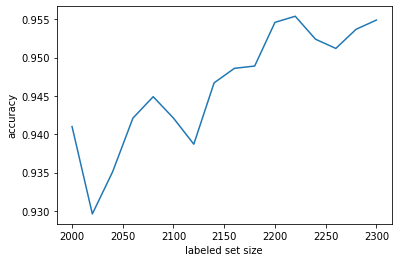

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (15 of 15) |########################| Elapsed Time: 0:04:09 Time:  0:04:09


=== uncertainty only learning finished ===


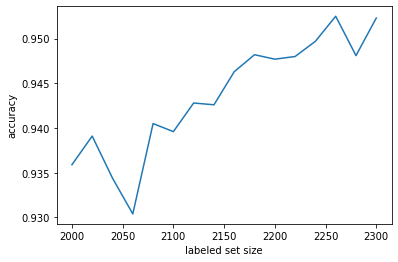

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (15 of 15) |########################| Elapsed Time: 0:04:11 Time:  0:04:11


=== uncertainty only learning finished ===


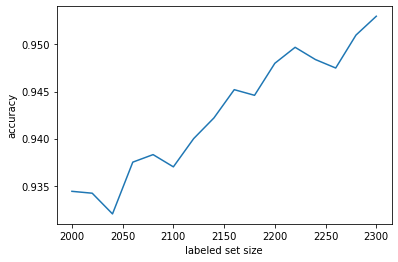

=== preparing standard labeled data ===
=== preparing initial model ===
=== uncertainty only learning started === 


100% (15 of 15) |########################| Elapsed Time: 0:04:07 Time:  0:04:07


=== uncertainty only learning finished ===


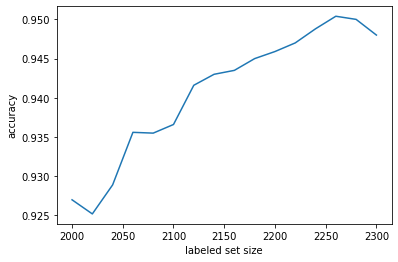

In [17]:
batch_size_stat = {}
for batch_size in [3, 5, 10, 20]:
    batch_size_stat[batch_size] = []
    for random_state in range(5):
        learner = learners.EntropyLearner()
        learner.compile(
            init_size=INIT_SIZE, 
            train_size=TRAIN_SIZE, 
            queries_number=QUERIED_SIZE // batch_size, 
            batch_size=batch_size,
            random_state=random_state
        )
        model = models.create_sequential_model()
        learner.learn(model, x_train, y_train, validation_data=(x_test, y_test))
        
        plots.plot_single(learner.get_stat(), "")
        plt.xlabel('labeled set size')
        plt.ylabel('accuracy')
        plt.show()
        
        batch_size_stat[batch_size].append(learner.get_stat())

In [31]:
import pickle
file3 = open('mnist_init_size_stat.pkl', 'rb')
init_size_stat = pickle.load(file3)
mnist_entropy = init_size_stat['entropy'][2000]
mnist_random = init_size_stat['random'][2000]

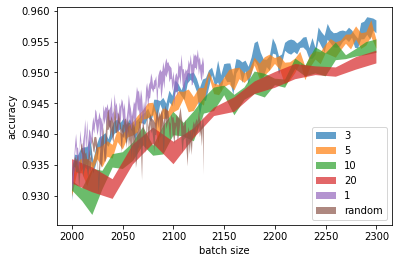

In [32]:
for batch_size in [3, 5, 10, 20]:
    plots.plot_conf_int(batch_size_stat[batch_size], str(batch_size))
plots.plot_conf_int(mnist_entropy, '1')
plots.plot_conf_int(mnist_random, 'random')
plt.xlabel('batch size')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [27]:
with open('mnist_batch_size_stat.pkl', 'wb') as f:
    pickle.dump(batch_size_stat, f)